<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C2/W2/ungraded_labs/C2_W2_Lab_1_cats_v_dogs_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%%writefile download.sh

#!/bin/bash
#fileid="$1"
#filename="$2"
#html=`curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}"`
#curl -Lb ./cookie "https://drive.google.com/uc?export=download&`echo ${html}|grep -Po '(confirm=[a-zA-Z0-9\-_]+)'`&id=${fileid}" -o ${filename}

Writing download.sh


In [4]:
# Download the dataset
#!bash download.sh 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9 cats_and_dogs_filtered.zip

In [1]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
# Constant for epochs
EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 30s - loss: 0.6866 - accuracy: 0.5315 - val_loss: 0.6568 - val_accuracy: 0.6350 - 30s/epoch - 304ms/step
Epoch 2/20
100/100 - 30s - loss: 0.6383 - accuracy: 0.6350 - val_loss: 0.6115 - val_accuracy: 0.6690 - 30s/epoch - 298ms/step
Epoch 3/20
100/100 - 30s - loss: 0.5853 - accuracy: 0.7000 - val_loss: 0.5860 - val_accuracy: 0.6730 - 30s/epoch - 295ms/step
Epoch 4/20
100/100 - 28s - loss: 0.5650 - accuracy: 0.7120 - val_loss: 0.5831 - val_accuracy: 0.6960 - 28s/epoch - 278ms/step
Epoch 5/20
100/100 - 28s - loss: 0.5326 - accuracy: 0.7305 - val_loss: 0.5720 - val_accuracy: 0.7000 - 28s/epoch - 283ms/step
Epoch 6/20
100/100 - 28s - loss: 0.5059 - accuracy: 0.7510 - val_loss: 0.5986 - val_accuracy: 0.6820 - 28s/epoch - 280ms/step
Epoch 7/20
100/100 - 28s - loss: 0.4869 - accuracy: 0.7670 - val_loss: 0.5907 - val_accuracy: 0.6840 - 28s/epoch - 281ms/step
Epoch 8/20
100/100 - 30s - loss: 0.4597 - accuracy: 0.7760 - val_loss: 0.5751 - val_accuracy: 0.7030 - 30s/epoch - 296

In [5]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

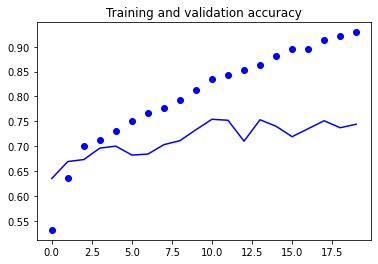

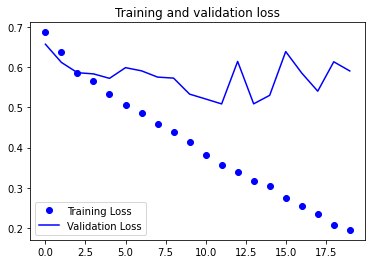

In [6]:
# Plot training results
plot_loss_acc(history)

# Data augmentation

In [7]:
# Create new model
model_for_aug = create_model()

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 35s - loss: 0.6932 - accuracy: 0.5200 - val_loss: 0.6824 - val_accuracy: 0.4990 - 35s/epoch - 353ms/step
Epoch 2/20
100/100 - 42s - loss: 0.6795 - accuracy: 0.5640 - val_loss: 0.6510 - val_accuracy: 0.6360 - 42s/epoch - 417ms/step
Epoch 3/20
100/100 - 42s - loss: 0.6559 - accuracy: 0.6140 - val_loss: 0.6315 - val_accuracy: 0.6580 - 42s/epoch - 417ms/step
Epoch 4/20
100/100 - 36s - loss: 0.6350 - accuracy: 0.6385 - val_loss: 0.6193 - val_accuracy: 0.6170 - 36s/epoch - 355ms/step
Epoch 5/20
100/100 - 38s - loss: 0.6179 - accuracy: 0.6685 - val_loss: 0.5937 - val_accuracy: 0.6590 - 38s/epoch - 380ms/step
Epoch 6/20
100/100 - 39s - loss: 0.6073 - accuracy: 0.6660 - val_loss: 0.6038 - val_accuracy: 0.6670 - 39s/epoch - 392ms/step
Epoch 7/20
100/100 - 40s - loss: 0.6031 - accuracy: 0.6695 - val_loss: 0.5577 - val_accuracy: 0.7050 - 40s/epoch - 395ms/step
Epoch 8/20
100/100 - 37s - loss: 0

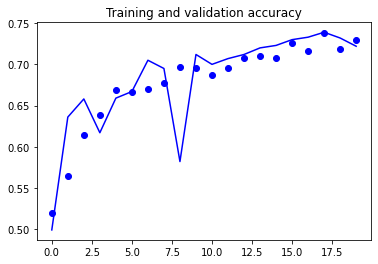

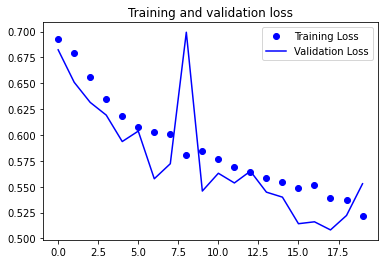

In [8]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)